In [1]:
import pandas as pd
import json

import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics.pairwise import cosine_similarity

## df1

In [2]:
df1 = pd.read_csv(r"C:\Users\ABHISHEK SONI\Downloads\movie recommendation project\tmdbdata\tmdb_5000_movies.csv")
df1.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
df1.iloc[0]

budget                                                          237000000
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
homepage                                      http://www.avatarmovie.com/
id                                                                  19995
keywords                [{"id": 1463, "name": "culture clash"}, {"id":...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                     150.437577
production_companies    [{"name": "Ingenious Film Partners", "id": 289...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2009-12-10
revenue                                                        2787965087
runtime                               

In [4]:
df1.iloc[0][1]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [5]:
df1.at[0, 'keywords']

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [6]:
df1.at[0, 'production_companies']

'[{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century Fox Film Corporation", "id": 306}, {"name": "Dune Entertainment", "id": 444}, {"name": "Lightstorm Entertainment", "id": 574}]'

In [7]:
df1.at[0, 'production_countries']

'[{"iso_3166_1": "US", "name": "United States of America"}, {"iso_3166_1": "GB", "name": "United Kingdom"}]'

In [8]:
df1.at[0, 'spoken_languages']

'[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "es", "name": "Espa\\u00f1ol"}]'

## df2

In [9]:
df2 = pd.read_csv(r"C:\Users\ABHISHEK SONI\Downloads\movie recommendation project\tmdbdata\tmdb_5000_credits.csv")
df2.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [10]:
df1.shape

(4803, 20)

In [11]:
df2.shape

(4803, 4)

## df => df1 : 'id' == df2 : 'movie_id'

In [12]:
df = pd.merge(df1, df2, left_on='id', right_on='movie_id', how='inner')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [13]:
df.shape

(4803, 24)

In [14]:
df = df.drop('movie_id', axis=1)

In [15]:
df['title'] = df['title_x']
df = df.drop(['original_title','title_x','title_y'], axis=1)

In [16]:
df.head()

,budget,genres,homepage,id,keywords,original_language,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,cast,crew,title
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Avatar
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Pirates of the Caribbean: At World's End
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Spectre
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",The Dark Knight Rises
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",John Carter


In [17]:
df.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
vote_average               0
vote_count                 0
cast                       0
crew                       0
title                      0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [19]:
df = df.drop(['homepage','tagline'], axis=1)

In [20]:
df.isna().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
overview                3
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
status                  0
vote_average            0
vote_count              0
cast                    0
crew                    0
title                   0
dtype: int64

In [21]:
df[df[['runtime','release_date','overview']].isnull().any(axis=1)].shape

(4, 19)

In [22]:
null_rows = df[(df['genres'] == '[]') & (df['vote_count'] == 0)]
df = df.drop(null_rows.index)

In [23]:
df.isna().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
overview                3
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 2
spoken_languages        0
status                  0
vote_average            0
vote_count              0
cast                    0
crew                    0
title                   0
dtype: int64

In [24]:
df['release_year'] = pd.to_datetime(df['release_date']).dt.year

<Axes: xlabel='release_year', ylabel='Count'>

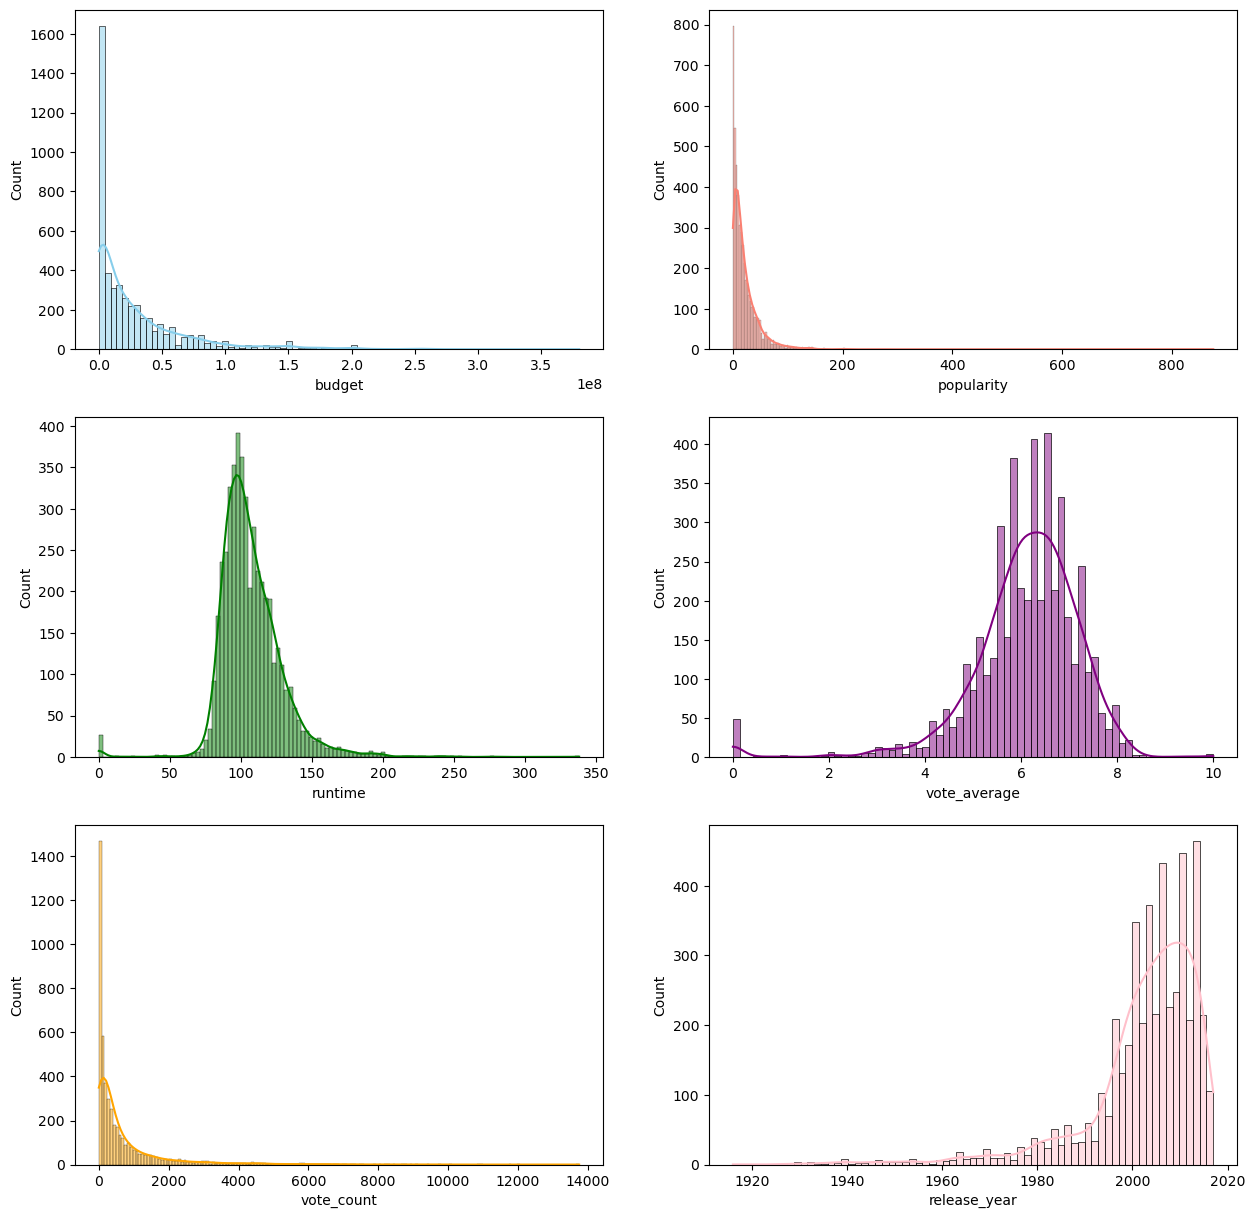

In [25]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Plot the distributions
sns.histplot(df['budget'], ax=axes[0, 0], kde=True, color='skyblue')
sns.histplot(df['popularity'], ax=axes[0, 1], kde=True, color='salmon')
sns.histplot(df['runtime'], ax=axes[1, 0], kde=True, color='green')
sns.histplot(df['vote_average'], ax=axes[1, 1], kde=True, color='purple')
sns.histplot(df['vote_count'], ax=axes[2, 0], kde=True, color='orange')
sns.histplot(df['release_year'], ax=axes[2, 1], kde=True, color='pink')

In [26]:
df[df['budget'] == 0].shape

(1024, 20)

In [27]:
df[df['revenue'] == 0].shape

(1413, 20)

In [28]:
df[df['status'] != 'Released'].shape

(8, 20)

In [29]:
df[df['popularity'] > 50].shape

(452, 20)

In [30]:
# Define popularity thresholds
low_threshold = df['popularity'].quantile(0.25)
medium_threshold = df['popularity'].quantile(0.75)

# Categorize popularity into high, medium, and low
df['popularity_category'] = pd.cut(df['popularity'], bins=[0, low_threshold, medium_threshold, float('inf')],
                                   labels=['Low_popularity', 'Medium_popularity', 'High_popularity'], right=False)

In [31]:
df[df['original_language'] != 'en'].shape

(298, 21)

# remove other columns

In [32]:
df = df.drop(df[['budget','revenue','status','runtime','original_language','popularity','release_date']],axis=1)

In [33]:
df.head()

,genres,id,keywords,overview,production_companies,production_countries,spoken_languages,vote_average,vote_count,cast,crew,title,release_year,popularity_category
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Avatar,2009,High_popularity
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Pirates of the Caribbean: At World's End,2007,High_popularity
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...","[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Spectre,2015,High_popularity
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",The Dark Knight Rises,2012,High_popularity
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",John Carter,2012,High_popularity


In [34]:
df.at[2,'crew']

'[{"credit_id": "54805967c3a36829b5002c41", "department": "Sound", "gender": 2, "id": 153, "job": "Original Music Composer", "name": "Thomas Newman"}, {"credit_id": "52fe4d22c3a368484e1d8d77", "department": "Directing", "gender": 2, "id": 39, "job": "Director", "name": "Sam Mendes"}, {"credit_id": "5677cd99925141691a005333", "department": "Art", "gender": 1, "id": 8384, "job": "Set Decoration", "name": "Anna Pinnock"}, {"credit_id": "52fe4d22c3a368484e1d8d8d", "department": "Writing", "gender": 2, "id": 932, "job": "Screenplay", "name": "John Logan"}, {"credit_id": "562fc9bb92514129fe0006b4", "department": "Writing", "gender": 2, "id": 932, "job": "Story", "name": "John Logan"}, {"credit_id": "5654d41c92514145c3000373", "department": "Art", "gender": 2, "id": 4248, "job": "Production Design", "name": "Dennis Gassner"}, {"credit_id": "52fe4d22c3a368484e1d8d71", "department": "Writing", "gender": 2, "id": 9856, "job": "Characters", "name": "Ian Fleming"}, {"credit_id": "54805989c3a36829a

In [35]:
def extract_names(json_str, key='name'):
    data = json.loads(json_str)
    return ', '.join([item[key] for item in data])

In [36]:
df['genres'] = df['genres'].apply(lambda x: extract_names(x) if pd.notna(x) else '')

In [37]:
# Apply the function to each element in the 'production_companies' column
df['production_companies'] = df['production_companies'].apply(lambda x: extract_names(x) if pd.notna(x) else '')

# Apply the function to each element in the 'production_countries' column
df['production_countries'] = df['production_countries'].apply(lambda x: extract_names(x, key='name') if pd.notna(x) else '')

In [38]:
# Apply the function to each element in the 'keywords' column
df['keywords'] = df['keywords'].apply(lambda x: extract_names(x) if pd.notna(x) else '')

In [39]:
df['spoken_languages'] = df['spoken_languages'].apply(lambda x: extract_names(x) if pd.notna(x) else '')

In [40]:
def extract_top_names(json_str, top_n=5):
    data = json.loads(json_str)
    return ', '.join([item['name'] for item in data[:top_n]])

In [41]:
# Apply the function to each element in the 'cast' column
df['cast'] = df['cast'].apply(lambda x: extract_top_names(x, top_n=5) if pd.notna(x) else '')

In [42]:
def remove_duplicates(names):
    unique_names = set()
    result = []
    for name in names:
        if name not in unique_names:
            result.append(name)
            unique_names.add(name)
    return result

# Function to extract crew names based on job roles and remove duplicates
def extract_crew_name(json_str, job_roles=['Producer', 'Director']):
    data = json.loads(json_str)
    names = [item['name'] for item in data if item.get('job', '') in job_roles]
    return ', '.join(remove_duplicates(names))

In [43]:
# Apply the function to each element in the 'crew' column
df['crew'] = df['crew'].apply(lambda x: extract_crew_name(x) if pd.notna(x) else '')

In [44]:
df.head(5)

,genres,id,keywords,overview,production_companies,production_countries,spoken_languages,vote_average,vote_count,cast,crew,title,release_year,popularity_category
0,"Action, Adventure, Fantasy, Science Fiction",19995,"culture clash, future, space war, space colony...","In the 22nd century, a paraplegic Marine is di...","Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom","English, Español",7.2,11800,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","James Cameron, Jon Landau",Avatar,2009,High_popularity
1,"Adventure, Fantasy, Action",285,"ocean, drug abuse, exotic island, east india t...","Captain Barbossa, long believed to be dead, ha...","Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,English,6.9,4500,"Johnny Depp, Orlando Bloom, Keira Knightley, S...","Gore Verbinski, Jerry Bruckheimer, Eric McLeod...",Pirates of the Caribbean: At World's End,2007,High_popularity
2,"Action, Adventure, Crime",206647,"spy, based on novel, secret agent, sequel, mi6...",A cryptic message from Bond’s past sends him o...,"Columbia Pictures, Danjaq, B24","United Kingdom, United States of America","Français, English, Español, Italiano, Deutsch",6.3,4466,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...","Sam Mendes, Barbara Broccoli, Michael G. Wilson",Spectre,2015,High_popularity
3,"Action, Crime, Drama, Thriller",49026,"dc comics, crime fighter, terrorist, secret id...",Following the death of District Attorney Harve...,"Legendary Pictures, Warner Bros., DC Entertain...",United States of America,English,7.6,9106,"Christian Bale, Michael Caine, Gary Oldman, An...","Charles Roven, Christopher Nolan, Emma Thomas",The Dark Knight Rises,2012,High_popularity
4,"Action, Adventure, Science Fiction",49529,"based on novel, mars, medallion, space travel,...","John Carter is a war-weary, former military ca...",Walt Disney Pictures,United States of America,English,6.1,2124,"Taylor Kitsch, Lynn Collins, Samantha Morton, ...","Andrew Stanton, Colin Wilson, Jim Morris, Lind...",John Carter,2012,High_popularity


In [45]:
df.dtypes

genres                    object
id                         int64
keywords                  object
overview                  object
production_companies      object
production_countries      object
spoken_languages          object
vote_average             float64
vote_count                 int64
cast                      object
crew                      object
title                     object
release_year               int64
popularity_category     category
dtype: object

In [46]:
df['overview'] = df['overview'].astype(str)

In [47]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply stopword removal to the 'overview' column
df['overview'] = df['overview'].apply(remove_stopwords)

In [48]:
# Split each overview into words and join with commas
df['overview'] = df['overview'].str.split().apply(lambda x: ', '.join(x))

In [49]:
df.at[0,'overview']

'22nd, century, ,, paraplegic, marine, dispatched, moon, pandora, unique, mission, ,, becomes, torn, following, orders, protecting, alien, civilization, .'

In [50]:
# Function to remove spaces within names and lowercase for columns with names
def process_names(text):
    return ', '.join([''.join(name.lower().split()) for name in text.split(',')])

# Columns to process
columns_with_names = ['genres', 'keywords', 'production_companies', 'production_countries', 'spoken_languages', 'cast', 'crew']

# Apply name processing to relevant columns
for column in columns_with_names:
    df[column] = df[column].apply(process_names)

In [51]:
df.dtypes

genres                    object
id                         int64
keywords                  object
overview                  object
production_companies      object
production_countries      object
spoken_languages          object
vote_average             float64
vote_count                 int64
cast                      object
crew                      object
title                     object
release_year               int64
popularity_category     category
dtype: object

In [52]:
df.describe()

,id,vote_average,vote_count,release_year
count,4789.000000,4789.000000,4789.000000,4789.000000
mean,56531.391313,6.109981,692.235749,2002.449572
std,87905.469898,1.149970,1235.824420,12.422114
min,5.000000,0.000000,0.000000,1916.000000
25%,9008.000000,5.600000,55.000000,1999.000000
50%,14577.000000,6.200000,237.000000,2005.000000
75%,58048.000000,6.800000,740.000000,2011.000000
max,459488.000000,10.000000,13752.000000,2017.000000


In [53]:
# Define bins and labels for vote_average
vote_average_bins = [0, 5, 7, 10]
vote_average_labels = ['low_vote', 'medium_vote', 'high_vote']
df['vote_average'] = pd.cut(df['vote_average'], bins=vote_average_bins, labels=vote_average_labels, include_lowest=True)

# Define bins and labels for vote_count
vote_count_bins = [0, 100, 500, 1000, float('inf')]
vote_count_labels = ['low_count', 'moderate_count', 'high_count', 'very_high_count']
df['vote_count'] = pd.cut(df['vote_count'], bins=vote_count_bins, labels=vote_count_labels, include_lowest=True)

# Define bins and labels for release_year (assuming a range of years)
release_year_bins = [1900, 1980, 2000, 2020, float('inf')]
release_year_labels = ['Before 1980', '1980-2000', '2000-2020', 'After 2020']
df['release_year'] = pd.cut(df['release_year'], bins=release_year_bins, labels=release_year_labels, include_lowest=True)

In [54]:
# Convert all columns to strings
df = df.astype(str)

In [55]:
df['features'] = df['genres'] + ', ' + df['keywords'] + ', ' + df['overview'] + ', ' + df['production_companies'] + ', ' + df['production_countries'] + ', ' + df['spoken_languages'] + ', ' + df['cast'] + ', ' + df['crew'] + ', ' + df['vote_average'] + ', ' + df['vote_count'] + ', ' +  df['release_year'] + ', ' + df['popularity_category']

In [56]:
movie_df = df[['id','title','features']]

In [57]:
movie_df.head()

,id,title,features
0,19995,Avatar,"action, adventure, fantasy, sciencefiction, cu..."
1,285,Pirates of the Caribbean: At World's End,"adventure, fantasy, action, ocean, drugabuse, ..."
2,206647,Spectre,"action, adventure, crime, spy, basedonnovel, s..."
3,49026,The Dark Knight Rises,"action, crime, drama, thriller, dccomics, crim..."
4,49529,John Carter,"action, adventure, sciencefiction, basedonnove..."


In [58]:
movie_df.at[0,'features']

'action, adventure, fantasy, sciencefiction, cultureclash, future, spacewar, spacecolony, society, spacetravel, futuristic, romance, space, alien, tribe, alienplanet, cgi, marine, soldier, battle, loveaffair, antiwar, powerrelations, mindandsoul, 3d, 22nd, century, ,, paraplegic, marine, dispatched, moon, pandora, unique, mission, ,, becomes, torn, following, orders, protecting, alien, civilization, ., ingeniousfilmpartners, twentiethcenturyfoxfilmcorporation, duneentertainment, lightstormentertainment, unitedstatesofamerica, unitedkingdom, english, español, samworthington, zoesaldana, sigourneyweaver, stephenlang, michellerodriguez, jamescameron, jonlandau, high_vote, very_high_count, 2000-2020, High_popularity'

In [59]:
import re

def clean_features(features_string):
    # Convert to lowercase
    cleaned_string = features_string.lower()

    # Remove characters other than alphanumeric, spaces, hyphens, and underscores
    cleaned_string = re.sub(r'[^a-z0-9\s_-]', '', cleaned_string)

    # Remove extra spaces
    cleaned_string = re.sub(r'\s+', ' ', cleaned_string)

    # Tokenization
    tokens = cleaned_string.split()

    # Join the tokens into a cleaned string
    cleaned_string = ' '.join(tokens)

    return cleaned_string

# Apply the clean_features function to the 'features' column
movie_df['features'] = movie_df['features'].apply(clean_features)

C:\Users\ABHISHEK SONI\AppData\Local\Temp\ipykernel_12340\3673905367.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['features'] = movie_df['features'].apply(clean_features)


In [60]:
movie_df.at[4,'features']

'action adventure sciencefiction basedonnovel mars medallion spacetravel princess alien steampunk martian escape edgarriceburroughs alienrace superhumanstrength marscivilization swordandplanet 19thcentury 3d john carter war-weary former military captain s inexplicably transported mysterious exotic planet barsoom mars reluctantly becomes embroiled epic conflict s world brink collapse carter rediscovers humanity realizes survival barsoom people rests hands waltdisneypictures unitedstatesofamerica english taylorkitsch lynncollins samanthamorton willemdafoe thomashadenchurch andrewstanton colinwilson jimmorris lindseycollins medium_vote very_high_count 2000-2020 high_popularity'

In [61]:
movie_df.head(30)

,id,title,features
0,19995,Avatar,action adventure fantasy sciencefiction cultur...
1,285,Pirates of the Caribbean: At World's End,adventure fantasy action ocean drugabuse exoti...
2,206647,Spectre,action adventure crime spy basedonnovel secret...
3,49026,The Dark Knight Rises,action crime drama thriller dccomics crimefigh...
4,49529,John Carter,action adventure sciencefiction basedonnovel m...
5,559,Spider-Man 3,fantasy action adventure dualidentity amnesia ...
6,38757,Tangled,animation family hostage magic horse fairytale...
7,99861,Avengers: Age of Ultron,action adventure sciencefiction marvelcomic se...
8,767,Harry Potter and the Half-Blood Prince,adventure fantasy family witch magic broom sch...
9,209112,Batman v Superman: Dawn of Justice,action adventure fantasy dccomics vigilante su...


In [62]:
lemmatizer = WordNetLemmatizer()
movie_df['features'] = movie_df['features'].apply(lambda x: [lemmatizer.lemmatize(word) for word in word_tokenize(x.lower())])

C:\Users\ABHISHEK SONI\AppData\Local\Temp\ipykernel_12340\2059307577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['features'] = movie_df['features'].apply(lambda x: [lemmatizer.lemmatize(word) for word in word_tokenize(x.lower())])


In [63]:
movie_df.at[4,'features']

['action',
 'adventure',
 'sciencefiction',
 'basedonnovel',
 'mar',
 'medallion',
 'spacetravel',
 'princess',
 'alien',
 'steampunk',
 'martian',
 'escape',
 'edgarriceburroughs',
 'alienrace',
 'superhumanstrength',
 'marscivilization',
 'swordandplanet',
 '19thcentury',
 '3d',
 'john',
 'carter',
 'war-weary',
 'former',
 'military',
 'captain',
 's',
 'inexplicably',
 'transported',
 'mysterious',
 'exotic',
 'planet',
 'barsoom',
 'mar',
 'reluctantly',
 'becomes',
 'embroiled',
 'epic',
 'conflict',
 's',
 'world',
 'brink',
 'collapse',
 'carter',
 'rediscovers',
 'humanity',
 'realizes',
 'survival',
 'barsoom',
 'people',
 'rest',
 'hand',
 'waltdisneypictures',
 'unitedstatesofamerica',
 'english',
 'taylorkitsch',
 'lynncollins',
 'samanthamorton',
 'willemdafoe',
 'thomashadenchurch',
 'andrewstanton',
 'colinwilson',
 'jimmorris',
 'lindseycollins',
 'medium_vote',
 'very_high_count',
 '2000-2020',
 'high_popularity']

In [64]:
features_corpus = movie_df['features'].apply(lambda x: ' '.join(x))

In [65]:
cv = CountVectorizer(max_features=5000)
vectors = cv.fit_transform(features_corpus).toarray()

In [66]:
vectors.shape

(4789, 5000)

In [67]:
# Convert the sparse matrix to a DataFrame for better visualization
features_df = pd.DataFrame(vectors, columns=cv.get_feature_names_out())
features_df

,007,10,100,11,12,13,14,1492pictures,15,16,...,zachgalifianakis,zebra,zeus,zhangziyi,zoe,zoesaldana,zombie,zone,zoo,zooeydeschanel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4784,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4785,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4786,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4787,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
movie_df = movie_df.drop('features', axis=1)

In [69]:
movie_df.head()

,id,title
0,19995,Avatar
1,285,Pirates of the Caribbean: At World's End
2,206647,Spectre
3,49026,The Dark Knight Rises
4,49529,John Carter


In [70]:
# Calculate cosine similarity
cosine_sim = cosine_similarity(features_df)

# Create a DataFrame with movie titles and their corresponding cosine similarity scores
cosine_sim_df = pd.DataFrame(cosine_sim, index=features_df.index, columns=features_df.index)

In [71]:
cosine_sim_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4779,4780,4781,4782,4783,4784,4785,4786,4787,4788
0,1.000000,0.189568,0.237729,0.137058,0.267261,0.196429,0.126984,0.258199,0.225877,0.193429,...,0.091372,0.109971,0.066881,0.135526,0.047619,0.071993,0.103944,0.112548,0.104189,0.079243
1,0.189568,1.000000,0.204465,0.110022,0.216730,0.202733,0.131060,0.228416,0.186501,0.199637,...,0.125739,0.113501,0.086284,0.116563,0.032765,0.074304,0.107280,0.135521,0.107533,0.102233
2,0.237729,0.204465,1.000000,0.133045,0.185312,0.208013,0.107858,0.214834,0.219265,0.170697,...,0.177394,0.106752,0.064923,0.109632,0.046225,0.122300,0.100901,0.127462,0.101139,0.096154
3,0.137058,0.110022,0.133045,1.000000,0.113961,0.119925,0.118445,0.151383,0.168550,0.314918,...,0.090909,0.102576,0.062383,0.101130,0.059222,0.080582,0.051709,0.111979,0.108845,0.118262
4,0.267261,0.216730,0.185312,0.113961,1.000000,0.183742,0.148478,0.241523,0.147902,0.197386,...,0.142451,0.102869,0.062561,0.126773,0.029696,0.067344,0.097231,0.105279,0.097460,0.092656


In [72]:
recommendation_df = pd.concat([movie_df, cosine_sim_df], axis=1)

In [73]:
def recommend_movies(movie_title, top_n=5):
    # Get the index of the movie
    movie_index = recommendation_df[recommendation_df['title'] == movie_title].index[0]

    # Get the cosine similarity scores for the specified movie
    similarity_scores = recommendation_df.iloc[movie_index, 2:]

    # Sort movies based on similarity scores in descending order
    similar_movies = similarity_scores.sort_values(ascending=False)

    # Exclude the movie itself from the recommendations
    similar_movies = similar_movies.drop(movie_index)

    # Get the top N recommended movies
    top_movies = similar_movies.head(top_n)

    # Get the movie titles corresponding to the indices
    recommended_titles = movie_df.loc[top_movies.index, 'title'].tolist()

    return recommended_titles

In [76]:
# Example usage:
movie_title = "Titanic"
recommendations = recommend_movies(movie_title)
print(f"Recommended movies for '{movie_title}':\n{recommendations}")

Recommended movies for 'Titanic':
['Captain Phillips', 'The Notebook', 'WALL·E', 'In the Heart of the Sea', 'Supernova']
